# NAML project - Stroke prediction
###  Cavallini - Eusebio

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [39]:
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

cathegorical_features = ['work-type', 'smoking-status']
binary_features = ['hypertension', 'heart-disease', 'gender', 'ever-married', 'Residence-type']
numerical_features = ['age', 'avg-glucose-level', 'bmi']

df.columns = new_cols

In [40]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
df.drop('id', axis=1, inplace=True) # drop id column because it is not useful

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Data Pre-processing

In [43]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart-disease          0
ever-married           0
work-type              0
Residence-type         0
avg-glucose-level      0
bmi                  201
smoking-status         0
stroke                 0
dtype: int64

In [44]:
df.dropna(inplace=True)

In [45]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart-disease        0
ever-married         0
work-type            0
Residence-type       0
avg-glucose-level    0
bmi                  0
smoking-status       0
stroke               0
dtype: int64

As we can clearly see the BMI column presents some N/A values that we have removed. 

In [46]:
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart-disease      4073 non-null   int64  
 4   ever-married       4073 non-null   object 
 5   work-type          4073 non-null   object 
 6   Residence-type     4073 non-null   object 
 7   avg-glucose-level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking-status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


In the paper is clearly stated that only the patients above 18 years old were considered. We have removed the patients below 18 years old.

In [47]:
df = df[df['smoking-status'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3256 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3256 non-null   object 
 1   age                3256 non-null   float64
 2   hypertension       3256 non-null   int64  
 3   heart-disease      3256 non-null   int64  
 4   ever-married       3256 non-null   object 
 5   work-type          3256 non-null   object 
 6   Residence-type     3256 non-null   object 
 7   avg-glucose-level  3256 non-null   float64
 8   bmi                3256 non-null   float64
 9   smoking-status     3256 non-null   object 
 10  stroke             3256 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [48]:
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [49]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


We filter out also the patients whose gender and smoking status are unknown. This to reducce the uncertainty in the data.

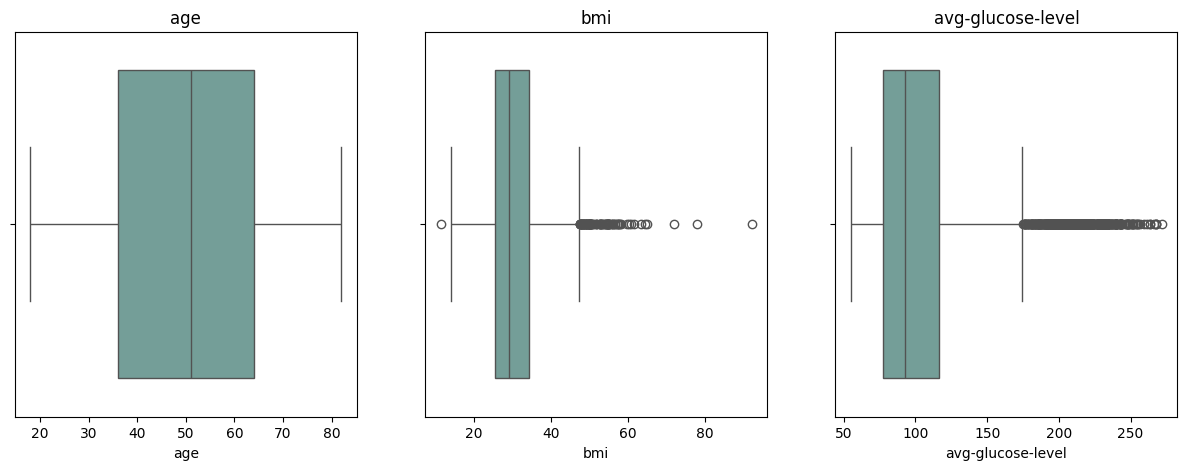

In [50]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [51]:
print(df[df['bmi'] < 12])

     gender   age  hypertension  heart-disease ever-married work-type  \
2187   Male  40.0             0              0          Yes   Private   

     Residence-type  avg-glucose-level   bmi smoking-status  stroke  
2187          Rural              60.96  11.5   never smoked       0  


In the paper, the autors have removed the single lowest bmi value. We have done the same.

In [52]:
df = df[df['bmi'] > 12]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


## Exploratory Data Analysis

In [53]:
stroke_count =df['stroke'].value_counts() # pandas serie, it contains the number of '1' (stroke) and the number of '0' (no stroke)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 5.53%


In [54]:
gender_count = df['gender'].value_counts()
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1260
Number of females:  1994


In [55]:
hypertension_count =df['hypertension'].value_counts()
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 12.54%


In [56]:
heart_disease_count =df['heart-disease'].value_counts()
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 6.33%


In [57]:
ever_married_count =df['ever-married'].value_counts()
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 79.84%


C:\Users\hp\AppData\Local\Temp\ipykernel_19244\140164340.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))


In [58]:
work_type_count =df['work-type'].value_counts()
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.03%
Self-employed percentage: 19.21%
Gov percentage: 15.67%
Never Worked fraction: 0.1%


C:\Users\hp\AppData\Local\Temp\ipykernel_19244\2819490883.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19244\2819490883.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19244\2819490883.py:4: FutureWarning: Series.__getitem__ 

In [59]:
residence_type_count =df['Residence-type'].value_counts()
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))

Urban percentage: 51.14%
Rural pergentage: 48.86%


C:\Users\hp\AppData\Local\Temp\ipykernel_19244\159459921.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19244\159459921.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))


In [60]:
smoking_status_count =df['smoking-status'].value_counts()
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.64%
Formely Smoked fraction: 24.98%
Smokes fraction: 22.37%


C:\Users\hp\AppData\Local\Temp\ipykernel_19244\4037653718.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19244\4037653718.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19244\4037653718.py:4: FutureWarning: Series.__getite

The percentages showed above are exactly the same as the ones in the paper.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [62]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


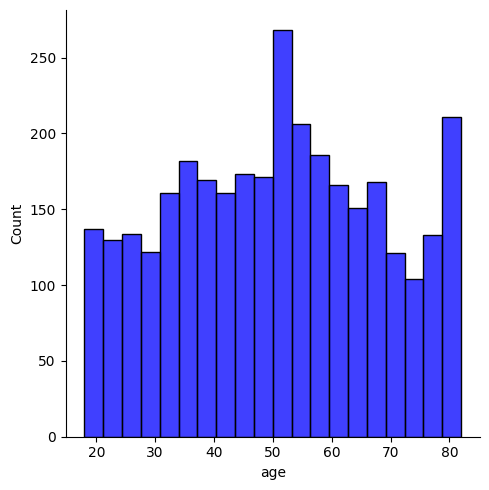

In [63]:
sns.displot(df['age'], bins=20, kde=False, color='blue')

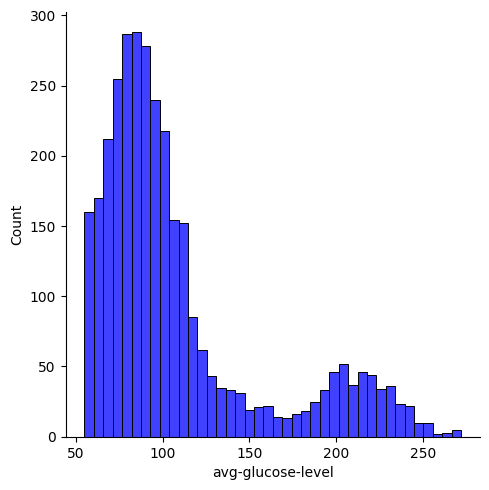

In [64]:
sns.displot(df['avg-glucose-level'], bins=40, kde=False, color='blue')

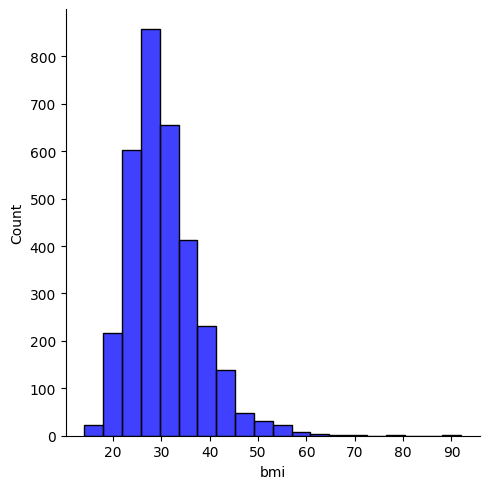

In [65]:
sns.displot(df['bmi'], bins=20, kde=False, color='blue')

### Oversampling

In [66]:
features = np.array(df.columns[:-1])
print(features)

X = df.drop(['stroke'], axis = 1) # Data
y = df['stroke'] # Target

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [67]:
y.value_counts()

stroke
0    3074
1     180
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

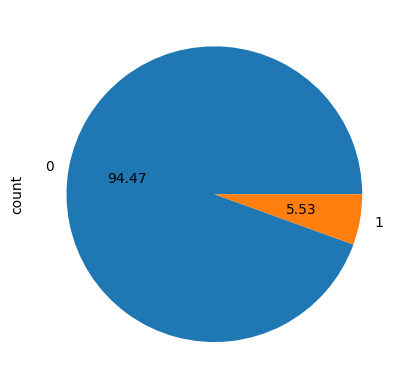

In [68]:
y.value_counts().plot.pie(autopct = "%.2f")

We can clearly see that there is a disproportion between the number of smokers and non-smokers. This is a problem because the model could be biased towards the non-smokers. We will try to balance the dataset by oversampling the smokers.

In [69]:
X.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


Train-Test Split

It is usually recommended to perform the oversampling only on the train dataset, therefore we will split the dataset into train and test and then oversample the train dataset.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # the data is split into 80% training and 20% testing randomly

In [71]:
X_train.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
3035,Male,33.0,0,0,Yes,Self-employed,Urban,90.68,31.7,smokes
1664,Female,68.0,0,0,Yes,Private,Urban,103.46,35.9,never smoked
3451,Female,42.0,0,0,Yes,Private,Rural,80.00,27.5,never smoked
2462,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,never smoked
3330,Female,56.0,0,0,Yes,Private,Urban,80.08,25.6,never smoked


Applying the oversampling SMOTE technique

In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder, RobustScaler


X_tmp = X_train.copy()
y_tmp = y_train.copy()

# Apply one hot encoding to cathegorical features
dummies = pd.get_dummies(X_tmp[cathegorical_features])
dummies_columns = dummies.columns

X_tmp = X_tmp.drop(cathegorical_features, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)

tmp_features = X_tmp.columns

# Apply ordinal encoding to binary features
oe = OrdinalEncoder()
X_tmp[binary_features] = oe.fit_transform(X_tmp[binary_features])

# Normalize the data
scaler = RobustScaler()
X_tmp[numerical_features] = scaler.fit_transform(X_tmp[numerical_features], y_tmp)

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_tmp, y_tmp)

# Reconstructing the dataframe
X_smote = pd.DataFrame(X_smote, columns=tmp_features)

# Inverse the normalization
X_smote[numerical_features] = scaler.inverse_transform(X_smote[numerical_features])

# Averaging out the data that came from the SMOTE
X_smote[dummies_columns] = np.round(X_smote[dummies_columns])
X_smote[binary_features] = np.round(X_smote[binary_features]).astype(int)

# inverse the ordinal encoding
X_smote[binary_features] = oe.inverse_transform(X_smote[binary_features])

dummies = pd.from_dummies(X_smote[dummies_columns], sep='_')
X_smote.drop(columns=dummies_columns, inplace=True)

X_smote = pd.concat([X_smote, dummies], axis=1)
X_smote.describe()

ValueError: Dummy DataFrame contains multi-assignment(s); First instance in row: 2603

In [ ]:
X_smote['work-type'].value_counts()

work-type
Private          3131
Self-employed    1174
Govt_job          607
Never_worked        2
Name: count, dtype: int64

In [ ]:
X_balanced = X_smote.copy()
y_balanced = y_smote.copy()

X_train = X_smote.copy()
y_train = y_smote.copy()

# after oversampling the hypertension and heart-disease cathegory have become of type 'object'
X_train['hypertension'] = X_train['hypertension'].astype(int)
X_train['heart-disease'] = X_train['heart-disease'].astype(int)

In [ ]:
df_balanced = X_balanced
df_balanced['stroke'] = y_balanced
df_balanced.head()

,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status,stroke
0,Male,61.0,0,0,Yes,Urban,61.32,23.7,Private,smokes,0
1,Male,45.0,1,0,Yes,Urban,90.43,39.7,Self-employed,smokes,0
2,Female,65.0,0,0,Yes,Rural,185.28,32.0,Private,smokes,0
3,Female,44.0,0,0,Yes,Urban,57.33,24.6,Govt_job,smokes,0
4,Male,59.0,0,0,Yes,Urban,70.04,31.4,Govt_job,never smoked,0


In [ ]:
df_balanced.describe()

,age,avg-glucose-level,bmi,stroke
count,4914.000000,4914.000000,4914.000000,4914.000000
mean,58.825740,122.936344,30.726551,0.500000
std,17.095839,57.029951,6.602600,0.500051
min,18.000000,55.120000,14.100000,0.000000
25%,48.000000,80.049286,26.405523,0.000000
50%,61.000000,99.408365,29.740569,0.500000
75%,73.595609,174.992759,33.992038,1.000000
max,82.000000,271.740000,92.000000,1.000000


### Graphs

<AxesSubplot:xlabel='stroke', ylabel='count'>

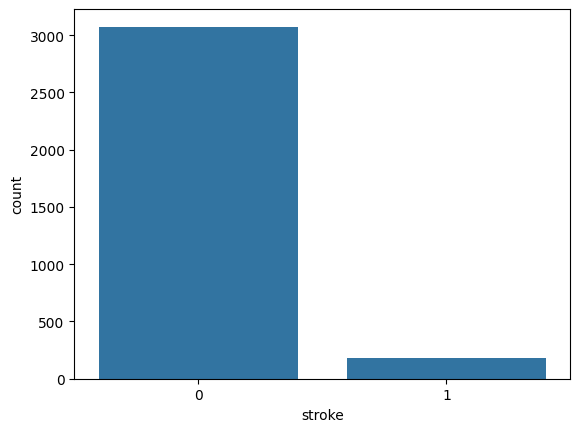

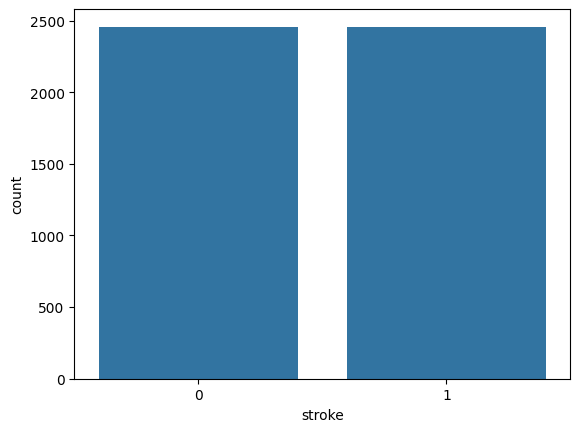

In [ ]:
sns.countplot(x='stroke', data=df)
plt.figure()
sns.countplot(x='stroke', data=df_balanced)

We can clearly see that the dataset is now balanced. The stroke and non-stroke patients are now equally represented in the train dataset.

<AxesSubplot:xlabel='age_bucket', ylabel='percent'>

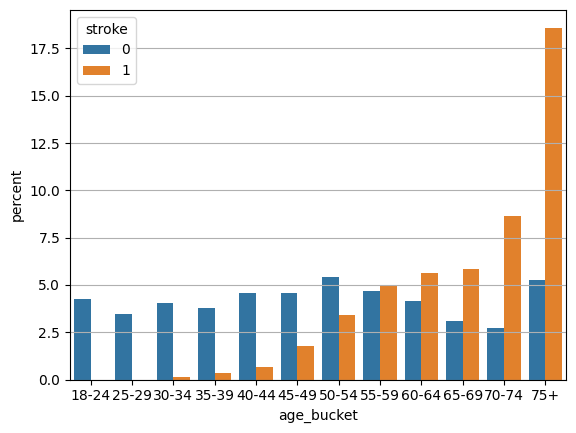

In [ ]:
plt.grid()
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
dataset_bal_copy = df_balanced.copy()
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

As also observed in the paper, the number of elderly patients who had a stroke is higher than the number of young patients who had a stroke. This is a common observation in the medical field.

<AxesSubplot:xlabel='hypertension', ylabel='percent'>

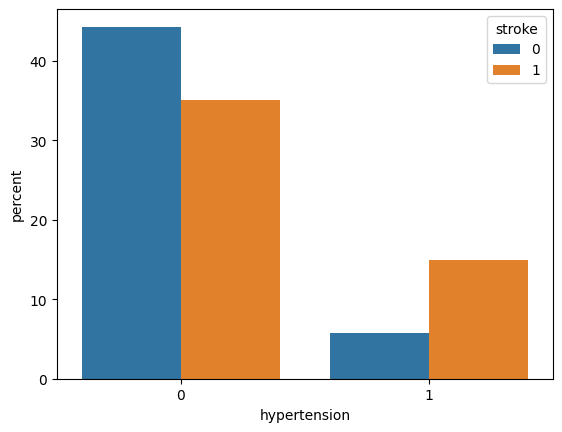

In [ ]:
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='heart-disease', ylabel='percent'>

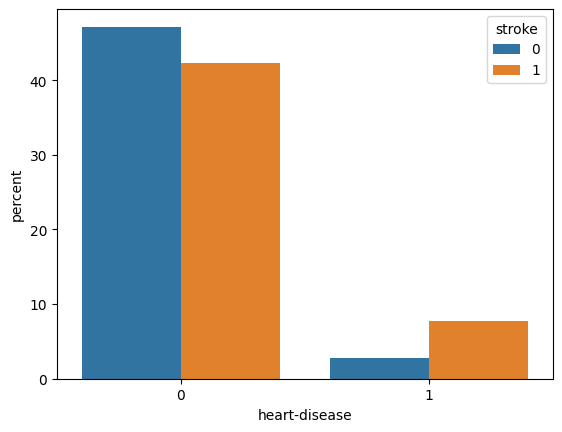

In [ ]:
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

The fact that the heart disesase class seem not to contribute significantly to the model is also observed in the paper. The authors explain it as a possible consequence of the lack of screening. When hearth diseases are not found, they can not be acted on.

<AxesSubplot:xlabel='smoking-status', ylabel='percent'>

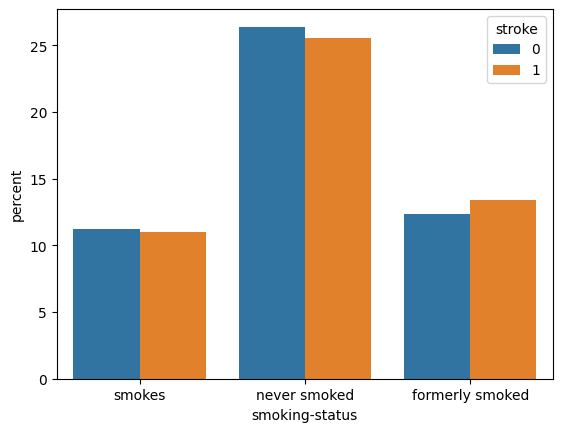

In [ ]:
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='bmi_bucket', ylabel='percent'>

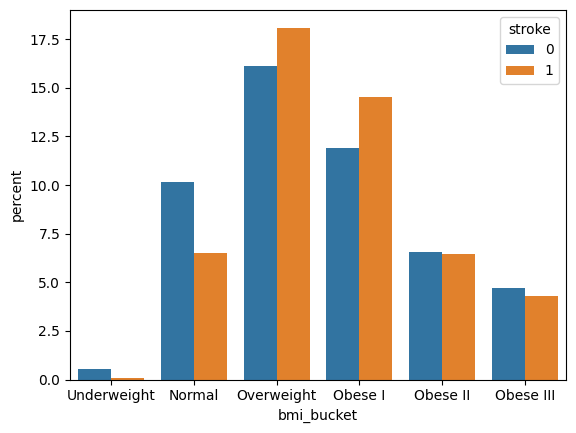

In [ ]:
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

<AxesSubplot:xlabel='Residence-type', ylabel='percent'>

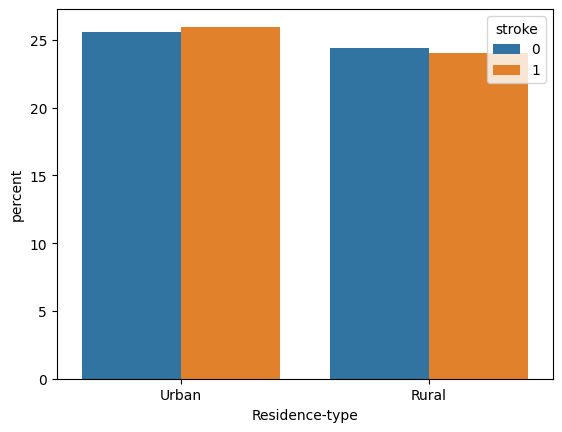

In [ ]:
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='work-type', ylabel='percent'>

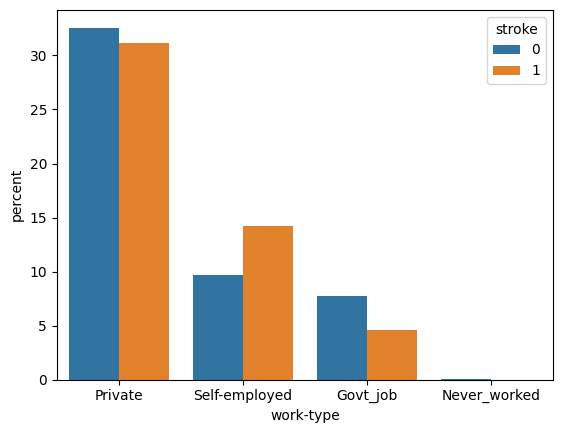

In [ ]:
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

The private sector seems to have a higher number of stroke patients.

<AxesSubplot:xlabel='gender', ylabel='percent'>

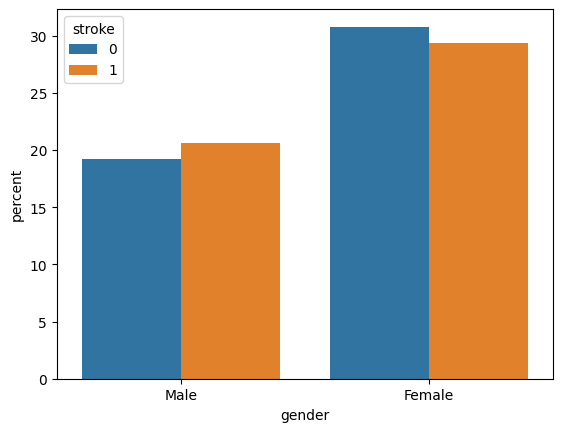

In [ ]:
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')

Before proceding, we may also visualize the features correlation with a heatmap

In [ ]:
df_balanced.head()

,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status,stroke
0,Male,61.0,0,0,Yes,Urban,61.32,23.7,Private,smokes,0
1,Male,45.0,1,0,Yes,Urban,90.43,39.7,Self-employed,smokes,0
2,Female,65.0,0,0,Yes,Rural,185.28,32.0,Private,smokes,0
3,Female,44.0,0,0,Yes,Urban,57.33,24.6,Govt_job,smokes,0
4,Male,59.0,0,0,Yes,Urban,70.04,31.4,Govt_job,never smoked,0


By plotting the correlation between the features, we can see that there is no strong correlation between the features. This is good because it means that the features are independent of each other.

## Feature Ranking

In [ ]:
X_train.head()

,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status
0,Male,61.0,0,0,Yes,Urban,61.32,23.7,Private,smokes
1,Male,45.0,1,0,Yes,Urban,90.43,39.7,Self-employed,smokes
2,Female,65.0,0,0,Yes,Rural,185.28,32.0,Private,smokes
3,Female,44.0,0,0,Yes,Urban,57.33,24.6,Govt_job,smokes
4,Male,59.0,0,0,Yes,Urban,70.04,31.4,Govt_job,never smoked


<AxesSubplot:xlabel='stroke', ylabel='count'>

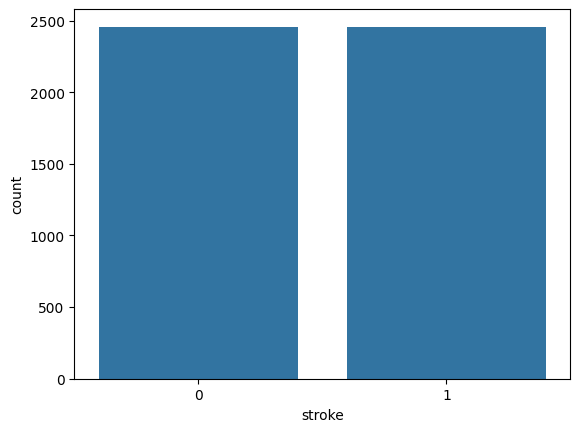

In [ ]:
df_train = X_train.copy()
df_train['stroke'] = y_train

sns.countplot(x='stroke', data=df_train)

### Apply the random forest classifier to select the most important features

We start with the preprocessing part

In [ ]:
X_tmp = X_train.copy()
y_tmp = y_train.copy()

# Apply one hot encoding to cathegorical features
dummies = pd.get_dummies(X_tmp[cathegorical_features]) 
X_tmp = X_tmp.drop(cathegorical_features, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)

tmp_features = X_tmp.columns

# Apply ordinal encoding to binary features
oe = OrdinalEncoder()
X_tmp[binary_features] = oe.fit_transform(X_tmp[binary_features])

# Normalize the data
scaler = RobustScaler()
X_tmp = scaler.fit_transform(X_tmp)

We procede training the random forest classifier

{'ever-married': 0.02124135856496327, 'heart-disease': 0.02178026209897993, 'gender': 0.02932543149986694, 'hypertension': 0.03337663786490782, 'Residence-type': 0.03432051499046417, 'work-type': 0.04377322825017469, 'smoking-status': 0.05304907171263509, 'bmi': 0.1709190609711344, 'avg-glucose-level': 0.2250913737376433, 'age': 0.3671230603092304}


<BarContainer object of 10 artists>

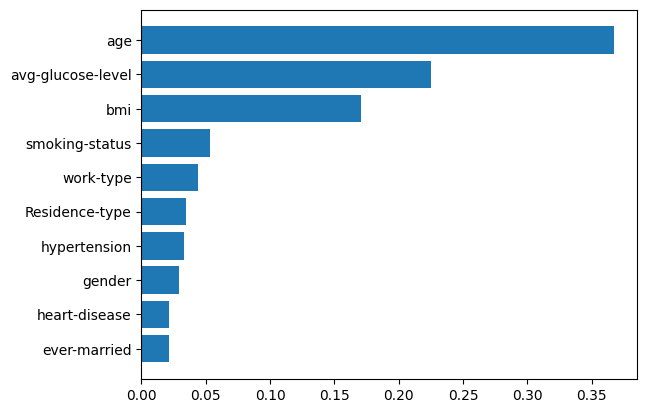

In [ ]:
from sklearn.ensemble import RandomForestClassifier

dataset_features = df.columns[:-1]

rf_classifier = RandomForestClassifier(random_state=42)

importances = dict()
for f in dataset_features:
    importances[f] = 0

rf_classifier.fit(X_tmp, y_train)

feature_importance = list(zip(tmp_features, rf_classifier.feature_importances_))

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp
    

importances = dict(sorted(importances.items(), key=lambda item: item[1]))
print(importances)    
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])

We continue with the feature ranking

{'Residence-type': 0.0, 'gender': 0.0029672879229367677, 'smoking-status': 0.006371363407240871, 'heart-disease': 0.008976049569578759, 'ever-married': 0.018646239184167968, 'hypertension': 0.032995416175009895, 'work-type': 0.034268653817880024, 'avg-glucose-level': 0.06839910216592693, 'bmi': 0.3787492030546349, 'age': 0.5154010876833546}


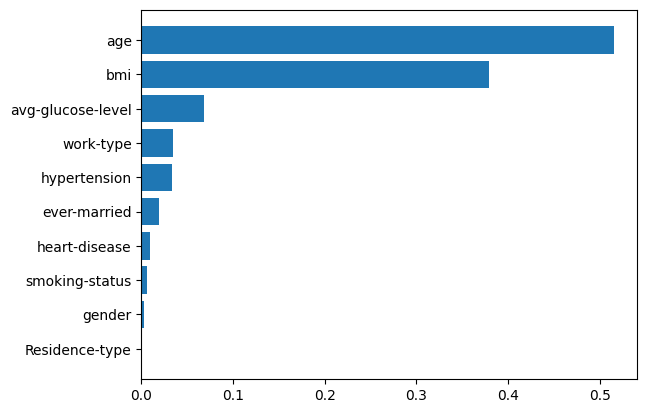

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_tmp, y_tmp, random_state=42)

feature_importance = list(zip(tmp_features, mi))
importances = dict()
for f in dataset_features:
    importances[f] = 0

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp


importances = dict(sorted(importances.items(), key=lambda item: item[1]))            
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])
print(importances)

Both models predict Age to be the the most influent feature in the prediction of stroke. This is consistent with the paper. Also hypertension is among the least important features in both models. This is also consistent with the paper.

## Model training

In this section we will train each model, as specified by the paper and we will compute the specified metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# metrics list
cross_val_scores_mean = dict()
accuracy = dict()
precision = dict()
recall = dict()

F_metric = dict()
auc_score = dict()

### Naive Bayes
Firstly, the naive Bayes (NB) classifier was considered, which ensures probability
maximization if the features are highly independent. In the Exploratory part, we have seen that the features do not have a strong correlation between them. This is a good sign for the NB classifier.

We are going to use a Gaussian Naive Bayes classifier, which is suitable for continuous data.

In [ ]:
print(X_train.shape)
X_train.head()

(4914, 10)


,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status
0,Male,61.0,0,0,Yes,Urban,61.32,23.7,Private,smokes
1,Male,45.0,1,0,Yes,Urban,90.43,39.7,Self-employed,smokes
2,Female,65.0,0,0,Yes,Rural,185.28,32.0,Private,smokes
3,Female,44.0,0,0,Yes,Urban,57.33,24.6,Govt_job,smokes
4,Male,59.0,0,0,Yes,Urban,70.04,31.4,Govt_job,never smoked


In [ ]:
print(X_test.shape)
X_test.head()

(651, 10)


,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
4681,Female,65.0,0,0,Yes,Self-employed,Rural,80.42,29.4,formerly smoked
467,Female,43.0,1,0,No,Self-employed,Rural,217.30,27.5,never smoked
4357,Male,61.0,0,0,Yes,Govt_job,Urban,107.33,26.4,formerly smoked
2428,Male,62.0,0,0,No,Govt_job,Urban,93.55,31.7,never smoked
4446,Female,42.0,0,0,Yes,Private,Urban,191.94,27.9,never smoked


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

processor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('bool', OrdinalEncoder(), binary_features),
        ('cat', OneHotEncoder(), cathegorical_features)])

scaler = ColumnTransformer(
    transformers=[
        ('all', StandardScaler(), slice(0, -1))
    ])

# Model definitions
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'SGD': SGDClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, learning_rate='constant', learning_rate_init=0.3, momentum=0.2)
}

for k, m in models.items():
    pipeline = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', m)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


    cross_val_scores_mean[k] = cross_val_score(pipeline, X_train, y_train, cv=10).mean()
    accuracy[k] = accuracy_score(y_test, y_pred)
    precision[k] = precision_score(y_test, y_pred)
    recall[k] = recall_score(y_test, y_pred)
    F_metric[k] = f1_score(y_test, y_pred)
    auc_score[k] = roc_auc_score(y_test, y_pred)

    print("Model ", k)
    print("10-fold cross validation score: ", cross_val_scores_mean[k])
    print("Accuracy: ", accuracy[k])
    print("Precision: ", precision[k])
    print("Recall: ", recall[k])
    print("F1 score: ", F_metric[k])
    print("AUC: ", auc_score[k])
    print("-------------------------")

Model  Naive Bayes
10-fold cross validation score:  0.5388654314241716
Accuracy:  0.1443932411674347
Precision:  0.05752961082910321
Recall:  1.0
F1 score:  0.1088
AUC:  0.5486223662884927
-------------------------
Model  Logistic Regression
10-fold cross validation score:  0.7511226466643486
Accuracy:  0.738863287250384
Precision:  0.14583333333333334
Recall:  0.8235294117647058
F1 score:  0.24778761061946902
AUC:  0.7788635713604728
-------------------------
Model  SGD
10-fold cross validation score:  0.7523392611726525
Accuracy:  0.7142857142857143
Precision:  0.1346153846153846
Recall:  0.8235294117647058
F1 score:  0.23140495867768596
AUC:  0.7658976070168748
-------------------------
Model  KNN
10-fold cross validation score:  0.9112765552299107
Accuracy:  0.8202764976958525
Precision:  0.0891089108910891
Recall:  0.2647058823529412
F1 score:  0.13333333333333333
AUC:  0.5577986462007818
-------------------------
Model  Decision Tree
10-fold cross validation score:  0.87587013395

Text(0.5, 1.0, 'AUC')

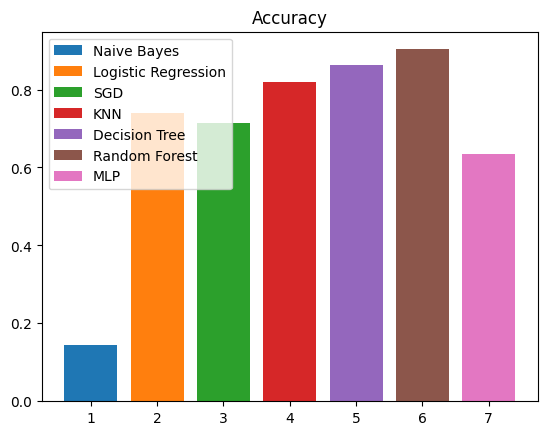

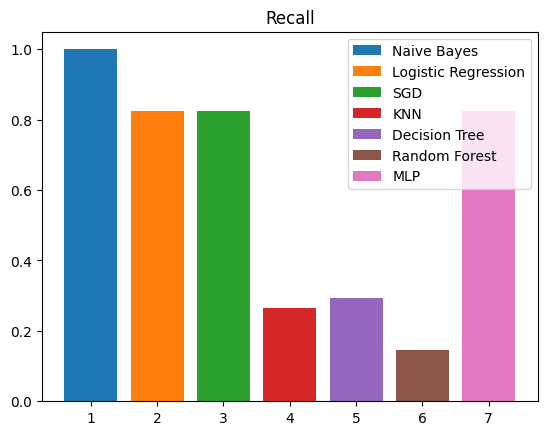

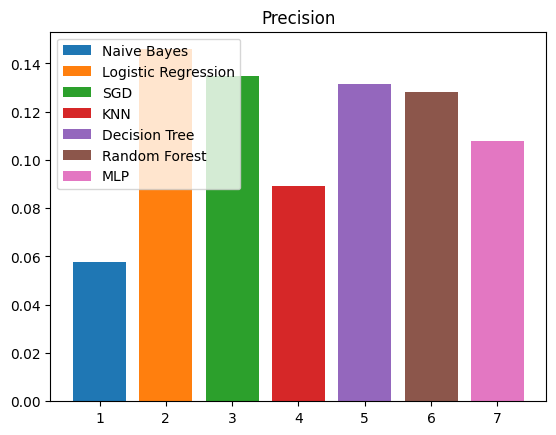

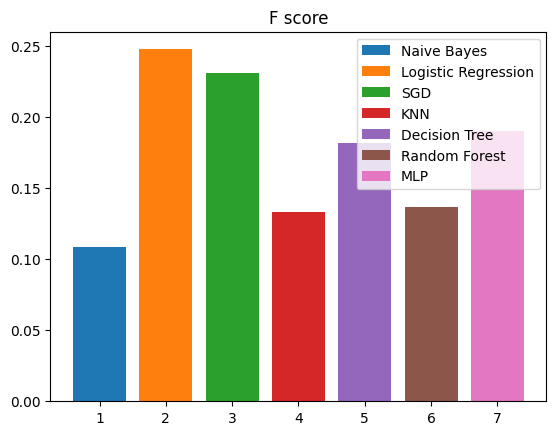

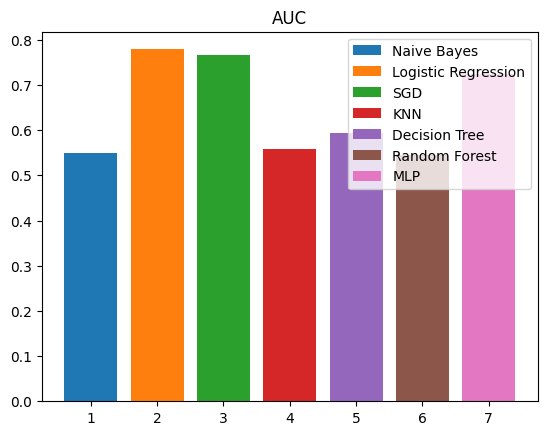

In [ ]:
## Accuracy
plt.figure()
i=1
for k, v in accuracy.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Accuracy")

## Recall
plt.figure()
i=1
for k, v in recall.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Recall")

## Precision
plt.figure()
i=1
for k, v in precision.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Precision")

## F score
plt.figure()
i=1
for k, v in F_metric.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("F score")

## AUC
plt.figure()
i=1
for k, v in auc_score.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("AUC")

The obtained results are very poor, we then procede to tune the hyperparameters of the models. Theoretically, this should improve our results.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

grid_models = [
               ('Naive Bayes', GaussianNB(),[{'var_smoothing': [1e-09]}]),
               ('Logistic Regression', LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}]),
               ('SGD', SGDClassifier(), [{'loss': ['hinge', 'log_loss', 'modified_huber'],'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1]}]),
               ('KNN', KNeighborsClassifier(),[{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']}]), 
               ('Decision Tree', DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               ('Random Forest', RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               ('MLP', MLPClassifier(),[{'hidden_layer_sizes':[(10,),(20,), (25,)],'max_iter':[500],'learning_rate':['constant'], 'learning_rate_init':[0.3,0.5,0.7], 'momentum':[0.2,0.4,0.6], 'activation': ['relu', 'tanh']}])
               ]

for k, m, param_grid in grid_models:
    grid = GridSearchCV(estimator=m, param_grid = param_grid, scoring = 'f1', cv = 10)

    pipeline = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', grid)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    best_accuracy = grid.best_score_
    best_param = grid.best_params_

    accuracy[k] = accuracy_score(y_test, y_pred)
    precision[k] = precision_score(y_test, y_pred)
    recall[k] = recall_score(y_test, y_pred)
    F_metric[k] = f1_score(y_test, y_pred)
    auc_score[k] = roc_auc_score(y_test, y_pred)

    print('{}:\nBest Accuracy : {:.2f}%'.format(k,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print(classification_report(y_test, y_pred))
    print('----------------')
    print('')

Naive Bayes:
Best Accuracy : 68.49%
Best Parameters :  {'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       1.00      0.10      0.18       617
           1       0.06      1.00      0.11        34

    accuracy                           0.14       651
   macro avg       0.53      0.55      0.14       651
weighted avg       0.95      0.14      0.17       651

----------------

Logistic Regression:
Best Accuracy : 76.12%
Best Parameters :  {'C': 1, 'random_state': 0, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       617
           1       0.15      0.82      0.25        34

    accuracy                           0.74       651
   macro avg       0.57      0.78      0.54       651
weighted avg       0.94      0.74      0.81       651

----------------

SGD:
Best Accuracy : 77.34%
Best Parameters :  {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'}
           

Now we consider the models using the newly found hyperparameters.

In [ ]:
processor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('bool', OrdinalEncoder(), binary_features),
        ('cat', OneHotEncoder(), cathegorical_features)])

scaler = ColumnTransformer(
    transformers=[
        ('all', StandardScaler(), slice(0, -1))
    ])

# Model definitions
models = {
    'Naive Bayes': GaussianNB(var_smoothing=1e-09),
    'Logistic Regression': LogisticRegression(C=0.75, random_state=0, solver='lbfgs'),
    'SGD': SGDClassifier(alpha=0.01, loss='log_loss', penalty='l2'),
    'KNN': KNeighborsClassifier(metric='chebyshev', n_neighbors=3, weights='distance'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'Random Forest': RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0),
    'MLP': MLPClassifier(activation ='tanh', hidden_layer_sizes=(25,), learning_rate='constant', learning_rate_init=0.3, max_iter=500, momentum=0.2)
}

Text(0.5, 1.0, 'AUC')

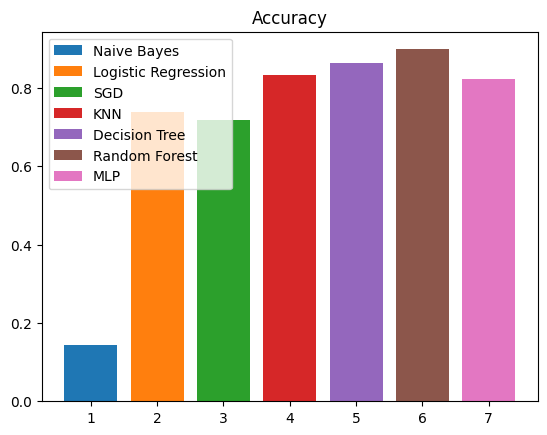

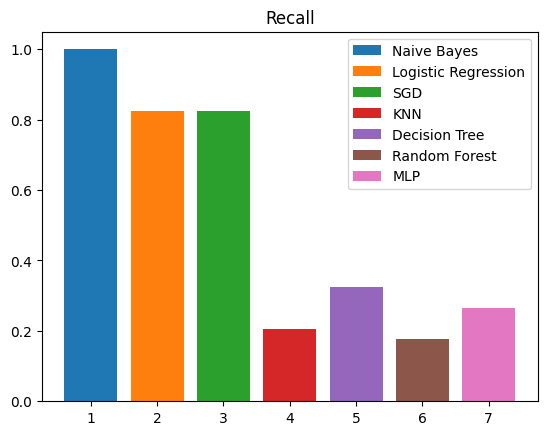

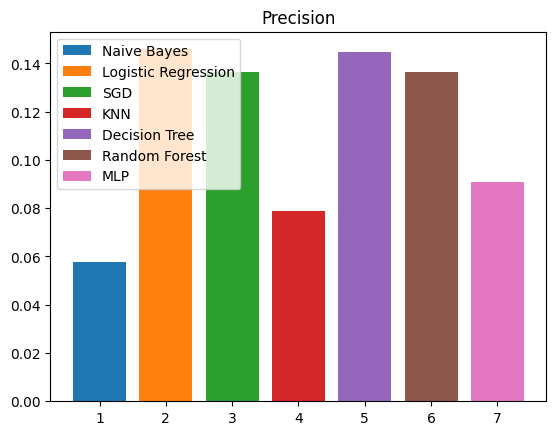

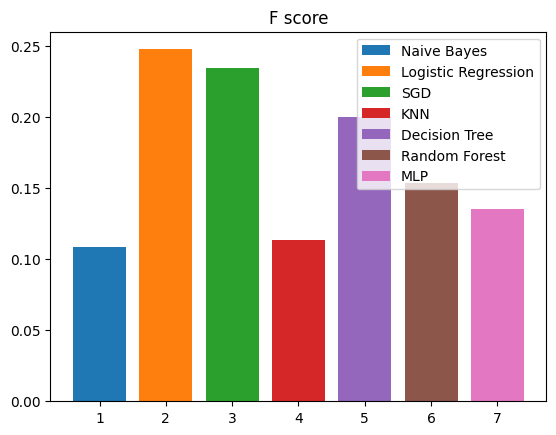

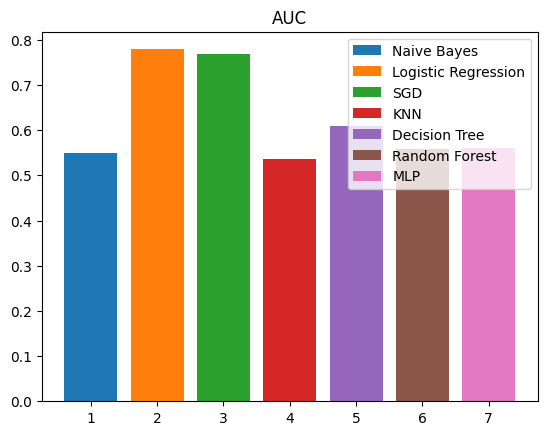

In [ ]:
## Accuracy
plt.figure()
i=1
for k, v in accuracy.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Accuracy")

## Recall
plt.figure()
i=1
for k, v in recall.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Recall")

## Precision
plt.figure()
i=1
for k, v in precision.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Precision")

## F score
plt.figure()
i=1
for k, v in F_metric.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("F score")

## AUC
plt.figure()
i=1
for k, v in auc_score.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("AUC")